# Modelo de Parcial II

In [1]:
%matplotlib inline 
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree, shortest_path, maximum_flow

### Pregunta 1

Considere la red de distribución que muestra la Figura 1. Encuentre la ruta más corta desde el nodo 1 hasta el nodo 8 de la red.
 1. Diga cual es la ruta y cuanto es la distancia recorrida.
 2. Considere que la ruta encontrada en **1** no es transitable, cual sería la modificación que haría en el código para buscar una nueva ruta más corta.
 3. Cual es la nueva ruta más en función de la condición en **2**
 
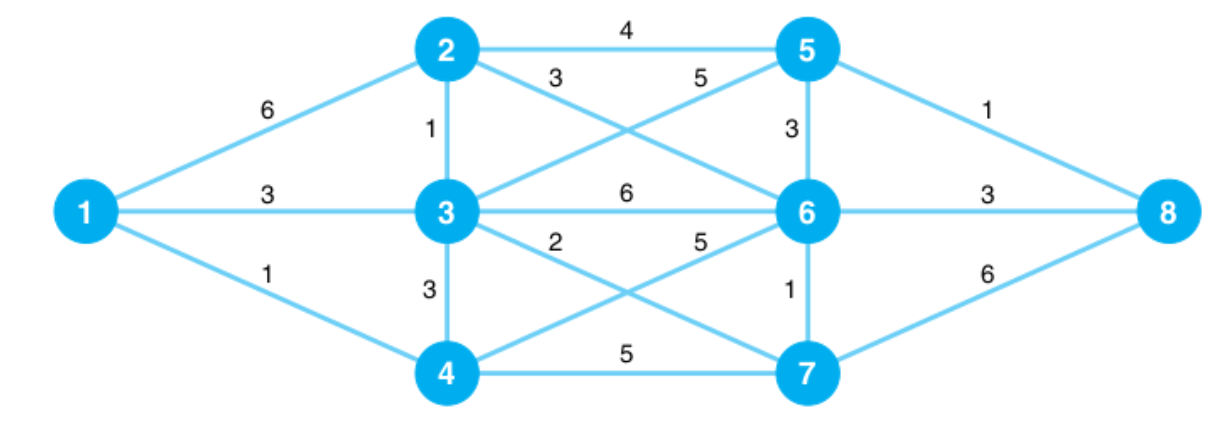

**Figura 1. Red del Problema 1**

Fuente: Elaboración Propia

In [5]:
# Parte 1
G = nx.Graph()

G.add_edge(1, 2, distance=6)
G.add_edge(1, 3, distance=3)
G.add_edge(1, 4, distance=1)

G.add_edge(2, 3, distance=1)
G.add_edge(2, 5, distance=4)
G.add_edge(2, 6, distance=3)

G.add_edge(3, 4, distance=3)
G.add_edge(3, 5, distance=5)
G.add_edge(3, 6, distance=6)
G.add_edge(3, 7, distance=2)

G.add_edge(4, 6, distance=5)
G.add_edge(4, 7, distance=5)

G.add_edge(5, 6, distance=3)
G.add_edge(5, 8, distance=1)

G.add_edge(6, 7, distance=1)
G.add_edge(6, 8, distance=3)

G.add_edge(7, 8, distance=6)

path = nx.shortest_path(G, weight="distance", source=1, target=8)
print(path)


[1, 4, 6, 8]


In [6]:
# Parte 2
G.remove_edge(1, 4)
G.remove_edge(4, 6)
G.remove_edge(6, 8)

[1, 3, 5, 8]


In [7]:
# Parte 3
path = nx.shortest_path(G, weight="distance", source=1, target=8)
print(path)

[1, 3, 5, 8]


Respuestas:

- Parte 1: `[1, 4, 6, 8]`
- Parte 2:
```python
G.remove_edge(1, 4)
G.remove_edge(4, 6)
G.remove_edge(6, 8)
```
- Parte 3: `[1, 3, 5, 8]`

### Pregunta 2

Los cinco nodos en la Figura 2 representan los puntos separados por un año durante un periodo de cuatro años. Cada nodo indica un momento en el cual se tomó una decisión para mantener o reemplazar un equipo de cómputo de la empresa. Si se toma la decisión de reemplazar el equipo, también se debe tomar una decisión con respecto a cuánto tiempo se usará el equipo nuevo. El arco desde el nodo 0 al 1 representa la decisión de mantener el equipo actual un año y reemplazarlo al final del año. El arco desde el nodo 0 al 2 representa la decisión de mantener el equipo actual dos años y reemplazarlo al final de éste. Los números encima de los arcos indican el costo total asociado con las decisiones de reemplazo de equipo. Estos costos incluyen precios de compra con descuento, valor de pago parcial, costos de operación y costos de mantenimiento.
1. Utilice un modelo de la ruta más corta para determinar la política de reemplazo de equipo de costo mínimo para el periodo de cuatro años.

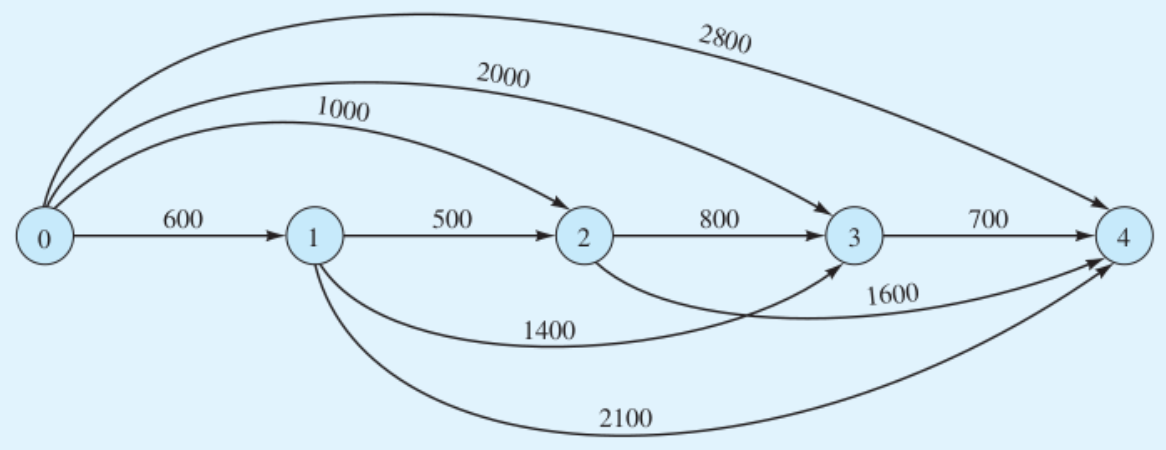

**Figura 2. Red del Problema 2**

Fuente: Elaboración Propia

In [9]:
G = nx.DiGraph()

G.add_edge(0, 1, cost=600)
G.add_edge(0, 2, cost=1000)
G.add_edge(0, 3, cost=2000)
G.add_edge(0, 4, cost=2800)

G.add_edge(1, 2, cost=500)
G.add_edge(1, 3, cost=1400)
G.add_edge(1, 4, cost=2100)


G.add_edge(2, 3, cost=800)
G.add_edge(2, 4, cost=1600)

G.add_edge(3, 4, cost=700)

path = nx.shortest_path(G, weight="cost", source=0, target=4)
print(path)

[0, 2, 3, 4]


Respuesta: 

1. `[0, 2, 3, 4]`

### Pregunta 3

Para el sistema de red de carreteras, que se muestra en la Figura 3 determine el flujo máximo en vehículos por hora. Ahora, la comisión de carreteras considera añadir una sección de carreteras 3-4 para permitir el flujo de 100 vehículos por hora o, a un costo adicional, un flujo de 300 vehículos por hora, por un costo mayor. Puntualizando:
1. Determine cuál es el flujo máximo máximo de la red
2. ¿Cuál es su recomendación para el arco 3-4 de la red?

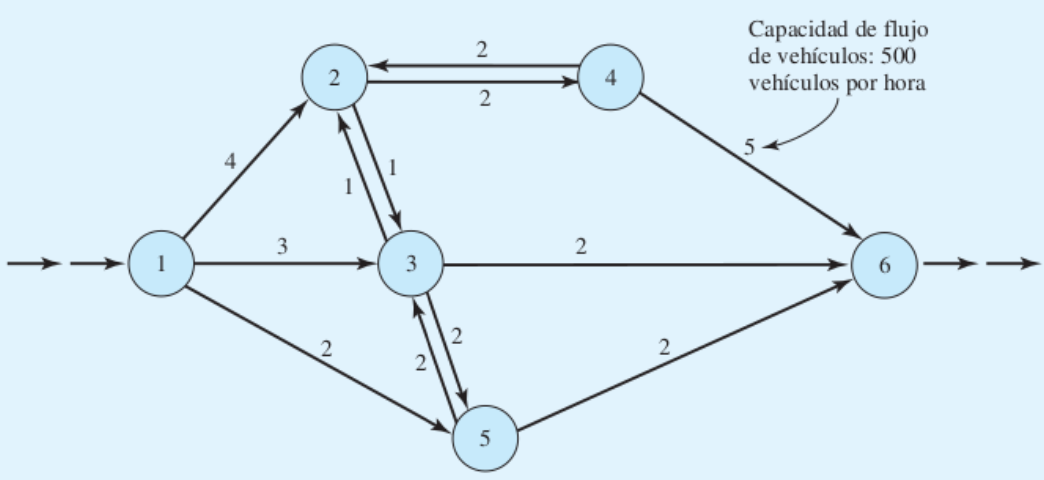

**Figura 3. Grafo del Problema 3**

Fuente: Elaboración Propia


In [10]:
# Parte 1
G = nx.DiGraph()

G.add_edge(1, 2, capacity=4)
G.add_edge(1, 3, capacity=3)
G.add_edge(1, 5, capacity=2)

G.add_edge(2, 3, capacity=1)
G.add_edge(2, 4, capacity=2)

G.add_edge(3, 2, capacity=1)
G.add_edge(3, 5, capacity=2)
G.add_edge(3, 6, capacity=2)

G.add_edge(4, 2, capacity=2)
G.add_edge(4, 6, capacity=5)

G.add_edge(5, 3, capacity=2)
G.add_edge(5, 6, capacity=2)

flow_value, flow_dict = nx.maximum_flow(G, 1, 6)
print(flow_value)


6


In [11]:
G.add_edge(3, 4, capacity=1)
flow_value, flow_dict = nx.maximum_flow(G, 1, 6)
print(f'100 veh/hr {flow_value}')

G.add_edge(3, 4, capacity=3)
flow_value, flow_dict = nx.maximum_flow(G, 1, 6)
print(f'300 veh/hr {flow_value}')

100 veh/hr 7
300 veh/hr 8


Respuestas:

1. 600 vehículos por hora
2. Al agregar, la opción de 300 veh/hr se observa que el flujo máximo es 800, un incremento de 200 sobre el valor original, la recomendación de hacer este tramo con esa capacidad se reduce a dos observaciones, la primera la estimación del crecimiento del parque vehicular de la ciudad o el costo. La opnion profesional indica que al aun quedar un flujo residual de 100 unidades debería construirse el de 300 para reducir el posible congestionamiento.

### Pregunta 4

Una planta de procesamiento químico tiene una red de tuberías que se usa para transferir productos químicos líquidos desde una parte de la planta a otra. La red de tuberías tiene capacidades de flujo en galones por minuto como se muestra en la Figura 4.
1. ¿Cuál es la capacidad de flujo máxima para el sistema si la empresa quiere transferir la mayor cantidad de producto químico posible del sitio 1 al 9?
2. ¿Cuánto producto químico fluirá por la sección de la tubería que va del nodo 3 al 5?
3. Si ocurre una avería en en la sección 3-5 cuál es el nuevo valor del flujo máximo

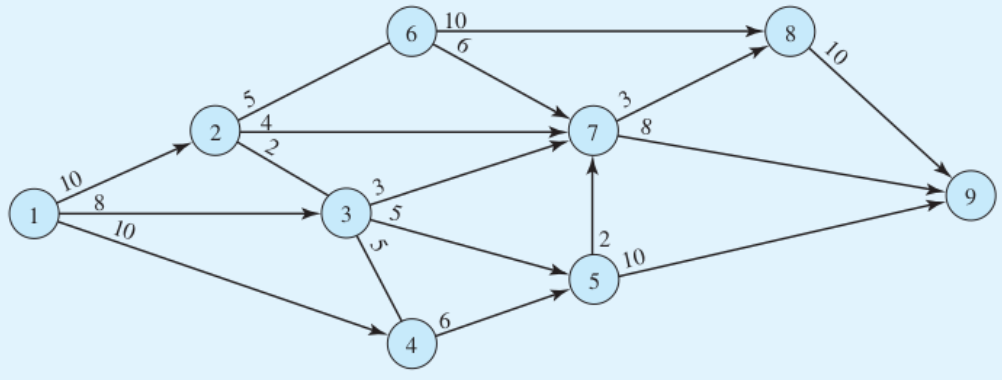

**Figura 4. Red del Problema 4**

Fuente: Elaboración Propia


In [12]:
# Parte 1
G = nx.DiGraph()

G.add_edge(1, 2, capacity=10)
G.add_edge(1, 3, capacity=8)
G.add_edge(1, 4, capacity=10)

G.add_edge(2, 3, capacity=2)
G.add_edge(2, 6, capacity=5)
G.add_edge(2, 7, capacity=4)

G.add_edge(3, 2, capacity=2)
G.add_edge(3, 4, capacity=5)
G.add_edge(3, 5, capacity=5)
G.add_edge(3, 7, capacity=3)

G.add_edge(4, 3, capacity=5)
G.add_edge(4, 5, capacity=6)

G.add_edge(5, 7, capacity=2)
G.add_edge(5, 9, capacity=10)

G.add_edge(6, 2, capacity=5)
G.add_edge(6, 7, capacity=6)
G.add_edge(6, 8, capacity=10)

G.add_edge(7, 8, capacity=3)
G.add_edge(7, 9, capacity=8)

G.add_edge(8, 9, capacity=10)

flow_value, flow_dict = nx.maximum_flow(G, 1, 9)
print(flow_value)


23


In [16]:
# Parte 2
print(flow_dict[3][5])


5


In [17]:
# Parte 3
G.remove_edge(3, 5)
flow_value, flow_dict = nx.maximum_flow(G, 1, 9)
print(flow_value)

18


Respuesta:

1. 23
2. 5
3. 18

### Pregunta 5

La Figura 5 da la distancia en kilómetros de los vínculos factibles que conectan nueve cabezales de pozos de gas natural localizados a una cierta distancia de la costa con un punto de distribución costero. Como el cabezal del pozo 1 es el más cercano a la costa, dispone de una suficiente capacidad de bombeo y almacenamiento para bombear la producción de los ocho pozos restantes al punto de distribución.
1. Determine la red de oleoductos mínima que vincule los cabezales de los pozos al punto de distribución.
2. Grafique la red del apartado 1.

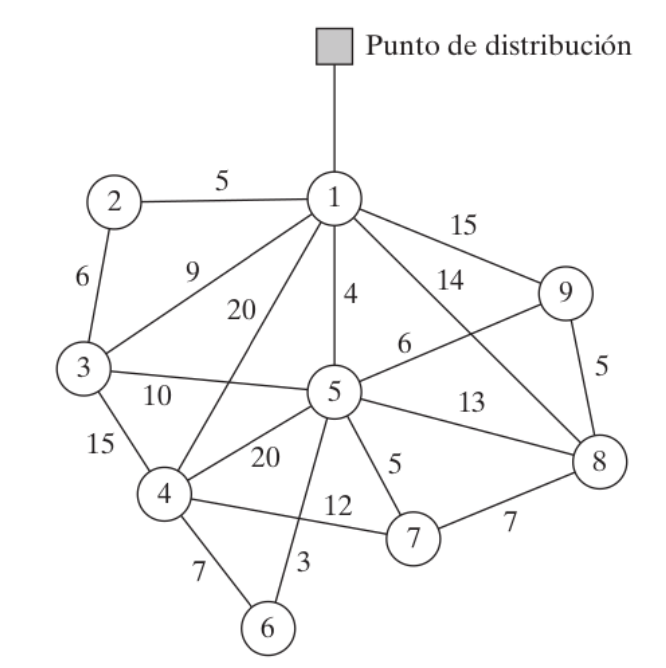

**Figura 5. Grafo del Problema 5**

Fuente: Elaboración Propia


In [18]:
G = nx.Graph()

G.add_edge(1, 2, weight=5)
G.add_edge(1, 3, weight=9)
G.add_edge(1, 4, weight=20)
G.add_edge(1, 5, weight=4)
G.add_edge(1, 8, weight=14)
G.add_edge(1, 9, weight=15)

G.add_edge(2, 3, weight=6)

G.add_edge(3, 4, weight=15)
G.add_edge(3, 5, weight=10)

G.add_edge(4, 5, weight=20)
G.add_edge(4, 6, weight=7)
G.add_edge(4, 7, weight=12)

G.add_edge(5, 6, weight=3)
G.add_edge(5, 7, weight=5)
G.add_edge(5, 8, weight=13)
G.add_edge(5, 9, weight=6)

G.add_edge(7, 8, weight=7)

G.add_edge(8, 9, weight=5)

T = nx.minimum_spanning_tree(G, algorithm='prim')
sorted(T.edges(data=True))

[(1, 2, {'weight': 5}),
 (1, 5, {'weight': 4}),
 (2, 3, {'weight': 6}),
 (4, 6, {'weight': 7}),
 (5, 6, {'weight': 3}),
 (5, 7, {'weight': 5}),
 (5, 9, {'weight': 6}),
 (8, 9, {'weight': 5})]

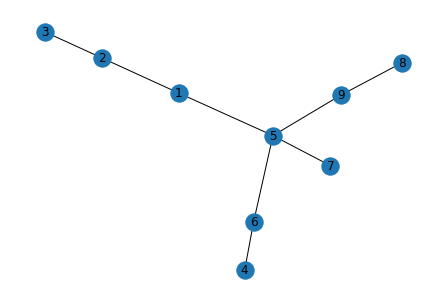

In [19]:
nx.draw(T, with_labels = True)